In [59]:
from PIL import Image
import numpy as np
from skimage.feature import local_binary_pattern
from skimage import color
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import convolve2d
import cv2

In [5]:
#untuk crop bagian wajah saja
def crop_face(image):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    # Detect faces in the image
    faces = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    if len(faces) > 0:
        # Assume the largest face in the image is the face of interest
        largest_face = max(faces, key=lambda rect: rect[2] * rect[3])
        x, y, w, h = largest_face
        face = image[y:y+h, x:x+w]
        return face

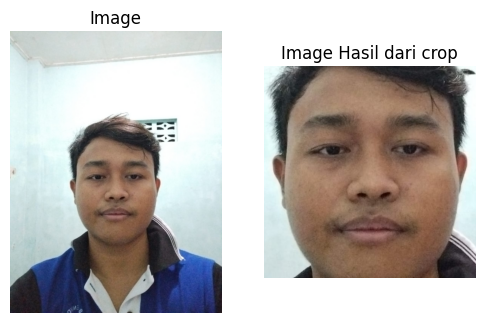

In [6]:
image_path = "data/test_haikal.jpg"
image = Image.open(image_path)
image_test = np.array(image)
result_test_crop = crop_face(image_test)
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.imshow(image_test)
plt.axis('off')
plt.title('Image')
plt.subplot(1, 2, 2)
plt.imshow(result_test_crop)
plt.axis('off')
plt.title('Image Hasil dari crop')
plt.show()

In [77]:
#confert to Grayscale
def convert2gray(image):
    return color.rgb2gray(image)

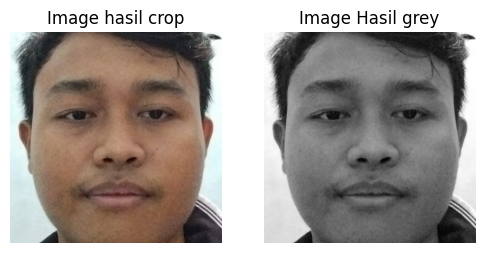

In [79]:


# image_path = "data/test_haikal.jpg"
# image = Image.open(image_path)
# image_test = np.array(image)
result_test_grey = convert2gray(result_test_crop)
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.imshow(result_test_crop)
plt.axis('off')
plt.title('Image hasil crop')
plt.subplot(1, 2, 2)
plt.imshow(result_test_grey, cmap='gray')
plt.axis('off')
plt.title('Image Hasil grey')
plt.show()

In [80]:
#Normalisasi image
def normalisasi_image(image, range_min=0, range_max=1):
    # Pastikan citra dalam format float untuk menghindari masalah pembulatan
    image = image.astype(np.float32)
    
    # Hitung nilai minimum dan maksimum dari citra
    min_val = np.min(image)
    max_val = np.max(image)
    
    # Lakukan normalisasi
    normalized_image = (image - min_val) / (max_val - min_val)
    
    # Skalakan ke rentang yang diinginkan
    normalized_image = normalized_image * (range_max - range_min) + range_min
    
    return normalized_image

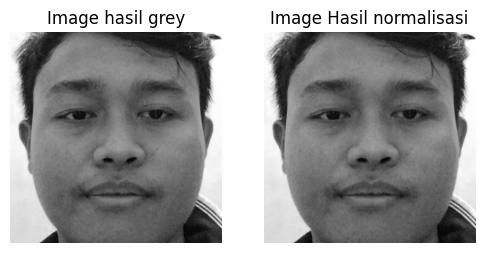

In [81]:
# result_test_grey = convert2gray(result_test_crop)
result_test_normalized = normalisasi_image(result_test_grey)
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.imshow(result_test_grey, cmap='gray')
plt.axis('off')
plt.title('Image hasil grey')
plt.subplot(1, 2, 2)
plt.imshow(result_test_normalized, cmap='gray')
plt.axis('off')
plt.title('Image Hasil normalisasi')
plt.show()

In [82]:
def metode_lbp(image, radius=3, n_points=8, method='uniform'):

    image = image.astype(np.float32)

    # Hitung LBP
    lbp = local_binary_pattern(image, n_points, radius, method)

    # Hitung histogram LBP
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

    # Normalisasi histogram
    hist = hist.astype(float) / sum(hist)

    return hist


In [83]:
def citra_digital_proccessing(image):
    image_cropped = crop_face(image)
    image_grayscale = convert2gray(image_cropped)
    image_normalizedd = normalisasi_image(image_grayscale)
    image_lab = metode_lbp(image_normalizedd)

    return image_lab

In [74]:
def main():
    folders = ["data_1","data_2","data_3", "data_4", "data_5"]
    photos = ["photo_1.jpg", "photo_2.jpg", "photo_3.jpg", "photo_4.jpg", "photo_5.jpg"]
    featlist = ['X1','X2','X3','X4','X5','X6','X7','X8','X9', 'X10','Y']
    final = []

    for folder in folders:
        print(folder)
        print(folders.index(folder))
        for x in range(len(photos)):
            image = Image.open("data\\" + folder +'\\'+ photos[x])
            image_processing = citra_digital_proccessing(np.array(image))
            fitur = np.append(image_processing, folders.index(folder))
            final.append(fitur)

    df = pd.DataFrame(final, columns=featlist)
    # print(len(featlist))
    filepath = "Training.csv"
    df.to_csv(filepath, index=False)
main()

data_1
0
data_2
1
data_3
2
data_4
3
data_5
4
